# Домашнее задание по метрике №3

Работу выполнял Блохин Павел Сергеевич ЭАД222, id - 14

year = 2023

industry = НАУКА, КУЛЬТУРА

region = все


In [12]:
import polars as pl
import pandas as pd 
import numpy as np
import statsmodels.api as sm # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
df_hw = pd.read_csv('Homework_2_data.csv', sep=';')
year = 2023
industry = 'НАУКА, КУЛЬТУРА'
region = ''
if industry == '':
    my_data = (df_hw[(df_hw.year == year) & (df_hw.region == region)])
elif region == '':
    my_data = (df_hw[(df_hw.year == year) & (df_hw.industry == industry)])
my_data

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
9,Краснодар,2,"36,5",1,"НАУКА, КУЛЬТУРА",8,50000,1,1,0,1,0,78,170,0,2023
29,"Удмуртская Республика, Глазов и Глазовский район",2,"42,5",1,"НАУКА, КУЛЬТУРА",8,25000,0,1,0,1,1,"49,7",157,0,2023
92,"Волгоградская область, Руднянский район",2,"36,5",0,"НАУКА, КУЛЬТУРА",8,34000,0,1,0,1,0,84,176,0,2023
122,Казань,0,66,1,"НАУКА, КУЛЬТУРА",6,14000,0,1,1,1,0,70,157,0,2023
142,Курган,2,"49,5",1,"НАУКА, КУЛЬТУРА",8,17000,1,1,1,1,1,71,164,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,"Калужская область, Куйбышевский район",2,33,1,"НАУКА, КУЛЬТУРА",8,27000,1,1,1,1,1,62,155,0,2023
4487,"Тамбовская область, Уварово и Уваровский район",0,"61,5",1,"НАУКА, КУЛЬТУРА",8,15000,0,0,1,1,1,76,159,0,2023
4551,"Красноярский край, Назарово и Назаровский район",1,"29,5",1,"НАУКА, КУЛЬТУРА",8,30000,0,1,1,1,0,57,170,0,2023
4584,Москва,0,"42,5",1,"НАУКА, КУЛЬТУРА",8,44000,0,1,1,1,0,45,160,1,2023


ну конечно мы будем все числа держать в str а не в int

In [9]:
df = pl.DataFrame(my_data)
df = df.with_row_index()
df = df.with_columns(
    pl.col('age').str.replace(',', '.'), 
    pl.col('wage').str.replace(',', '.'), 
    pl.col('weight').str.replace(',', '.'), 
    pl.col('height').str.replace(',', '.')
)
df = df.with_columns(
    pl.col('age').cast(pl.Float64),
    pl.col('wage').cast(pl.Float64),
    pl.col('weight').cast(pl.Float64),
    pl.col('height').cast(pl.Float64)
)
df = df.with_columns(
    pl.when(pl.col('educ') == 2).then(1).
    otherwise(0).alias('high')
)
df = df.to_pandas()

## Задание 1

### Оцениваем линейную модель 

In [10]:
X = df[['age', 'high', 'female', 'is_children', 'smoke']]
X = sm.add_constant(X)
y = df['wage']

model_1 = sm.OLS(y, X).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     10.72
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           2.08e-07
Time:                        01:06:22   Log-Likelihood:                -1367.0
No. Observations:                 119   AIC:                             2744.
Df Residuals:                     114   BIC:                             2758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age          -128.8333    186.065     -0.692      

In [11]:
coefficients = model_1.params

# Формируем уравнение модели
equation = f"wage = "
for variable, coef in coefficients.items():
    equation += f" + ({coef:.2f}) * {variable}"

# Выводим уравнение
print("Уравнение модели:")
print(equation)

Уравнение модели:
wage =  + (-128.83) * age + (23795.93) * high + (-14656.42) * female + (40889.57) * is_children + (6970.94) * smoke


всё тоже самое что и во втором дз, выводы будут в отчете

p.s в прошлом дз показывал, что за константу тут идёт is_children


## Задание 2

### Полулогарифмическая модель

In [17]:
X = df[['age', 'high', 'female', 'is_children', 'smoke']]
X = sm.add_constant(X)
y = np.log(df['wage'])

model_2 = sm.OLS(y, X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     12.01
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           3.51e-08
Time:                        02:04:09   Log-Likelihood:                -92.906
No. Observations:                 119   AIC:                             195.8
Df Residuals:                     114   BIC:                             209.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age            -0.0023      0.004     -0.551      

In [18]:
coefficients2 = model_2.params

# Формируем уравнение модели
equation = f"ln(wage) = "
for variable, coef in coefficients2.items():
    equation += f" + ({coef:.3f}) * {variable}"

# Выводим уравнение
print("Уравнение модели:")
print(equation)

Уравнение модели:
ln(wage) =  + (-0.002) * age + (0.560) * high + (-0.377) * female + (10.379) * is_children + (0.134) * smoke


измениние $X_i$ признака на одну единицу, $y$ увеличится примерно на $\beta_i$ %

подробнее в отчете 

## Задание 3

### Линейная модель с логарифмами 

In [21]:
X = df[['age', 'high', 'female', 'is_children', 'smoke']]
X['ln_age'] = np.log(X['age'])
X = X.drop('age', axis=1)
X = sm.add_constant(X)
y = np.log(df['wage'])

model_3 = sm.OLS(y, X).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     11.95
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           3.81e-08
Time:                        16:59:00   Log-Likelihood:                -92.996
No. Observations:                 119   AIC:                             196.0
Df Residuals:                     114   BIC:                             209.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
high            0.5633      0.103      5.484      

/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_24684/1491014034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ln_age'] = np.log(X['age'])


In [22]:
coefficients3 = model_3.params

# Формируем уравнение модели
equation = f"ln(wage) = "
for variable, coef in coefficients3.items():
    equation += f" + ({coef:.3f}) * {variable}"

# Выводим уравнение
print("Уравнение модели:")
print(equation)

Уравнение модели:
ln(wage) =  + (0.563) * high + (-0.377) * female + (10.545) * is_children + (0.137) * smoke + (-0.073) * ln_age


## Задание 4

### Выбор между второй и третьей моделью

Посмотрем на значения $R^2$, $R^2_{adj}$, $F-statistic$, можно сделать вывод что модель 2 лучше чем модель 3.
Поэтому надо сравнивать просто линейную модель и полулогарифмическую модель


### Выбор между первой и второй моделью

Будем пользоваться тестом Бокса-Кокса с преобразованием Зарембки


In [ ]:
from scipy.stats.mstats import gmean

X = df[['age', 'high', 'female', 'is_children', 'smoke']]
y = df['wage']
y_mean_g = gmean(y)
y_help = y / y_mean_g

#оценим две вспомогательные регрессии 

model_1_test = sm.OLS(y_help, X).fit()
model_2_test = sm.OLS(np.log(y_help), X).fit()
rss_1 = model_1_test.ssr
rss_2 = model_2_test.ssr
hi_2 = X.shape[0] / 2 * np.abs(np.log(rss_1 / rss_2))
print(f'hi2 statistics: {hi_2}')

hi2 statistics: 53.28642224282302


исходя из значений $\chi^2$ очевидно что $H_0$ отвергается, значит различия есть, тоесть смотрим на меньший $RSS$

In [28]:
print(f'linear RSS: {rss_1}')
print(f'log RSS: {rss_2}')

linear RSS: 81.30998066885628
log RSS: 33.20493969156385


Делаем вывод, что полулогарифмическая модель лучше

## Задание 5

### Дамми переменные

In [34]:
df['age_female'] = df['age'] * df['female']
df['high_female'] = df['high'] * df['female']
df['is_children_female'] = df['is_children'] * df['female']
df['smoke_female'] = df['smoke'] * df['female']

X_dumy = df[['age', 'high', 'is_children', 'smoke', 'age_female', 'high_female', 'is_children_female', 'smoke_female']]
X_dumy = sm.add_constant(X_dumy)
y = np.log(df['wage'])

model_dumy = sm.OLS(y, X_dumy).fit()
print(model_dumy.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     7.964
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           8.18e-08
Time:                        19:42:55   Log-Likelihood:                -89.622
No. Observations:                 119   AIC:                             195.2
Df Residuals:                     111   BIC:                             217.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                   -0.0190      0

In [35]:
hypotheses = ['age_female = 0', 'high_female = 0', 'is_children_female = 0', 'smoke_female = 0']
f_test = model_dumy.f_test('age_female = high_female = is_children_female = smoke_female = 0')
print("Результаты F-теста для взаимодействий:")
print(f_test)

Результаты F-теста для взаимодействий:
<F test: F=3.625828317431612, p=0.008130066179893938, df_denom=111, df_num=4>


Из проверки через Дамми пременными, можно сделать вывод, что различия между мужчинами и женщинами разница есть

In [32]:
coefficients_dumy = model_dumy.params

# Формируем уравнение модели
equation = f"ln(wage) = "
for variable, coef in coefficients_dumy.items():
    equation += f" + ({coef:.3f}) * {variable}"

# Выводим уравнение
print("Уравнение модели:")
print(equation)

Уравнение модели:
ln(wage) =  + (-0.019) * age + (0.897) * high + (-0.554) * female + (10.926) * is_children + (0.292) * smoke + (0.021) * age_female + (-0.370) * high_female + (-0.554) * is_children_female + (-0.207) * smoke_female


В отчете разделю на формулу для женщин и мужчин

### Тест Чоу

In [33]:
from scipy.stats import f

df_male = df[df['female'] == 0]
df_female = df[df['female'] == 1]

vars = ['age', 'high', 'is_children', 'smoke']
# для общей модели
X_full = sm.add_constant(df[vars])
y_full = np.log(df['wage'])
# для мужчин
X_male = sm.add_constant(df_male[vars])
y_male = np.log(df_male['wage'])
# для женщин
X_female = sm.add_constant(df_female[vars])
y_female = np.log(df_female['wage'])


model_full = sm.OLS(y_full, X_full).fit()
rss_full = model_full.ssr

# Построение модели для мужчин
model_male = sm.OLS(y_male, X_male).fit()
rss_male = model_male.ssr

# Построение модели для женщин
model_female = sm.OLS(y_female, X_female).fit()
rss_female = model_female.ssr

# Параметры для теста Чоу
n = df.shape[0]
k = X_full.shape[1]  # количество параметров включая константу
g = 2  # количество групп (мужчины и женщины)

chow_stat = ((rss_full - (rss_male + rss_female)) / k) / ((rss_male + rss_female) / (n - 2 * k))
p_value = 1 - f.cdf(chow_stat, k, n - 2 * k)

print(f"Статистика Чоу: {chow_stat:.4f}")
print(f"p-значение Чоу теста: {p_value:.4f}")


Статистика Чоу: 3.6258
p-значение Чоу теста: 0.0081


ну мы получили такой же результат, значит разница между мужчинами и женщинами всё таки есть

In [36]:
print(model_male.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     6.334
Date:                Sun, 15 Dec 2024   Prob (F-statistic):            0.00273
Time:                        20:17:20   Log-Likelihood:                -17.970
No. Observations:                  27   AIC:                             43.94
Df Residuals:                      23   BIC:                             49.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age            -0.0190      0.008     -2.291      

In [37]:
print(model_female.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     7.001
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           0.000281
Time:                        20:17:41   Log-Likelihood:                -71.407
No. Observations:                  92   AIC:                             150.8
Df Residuals:                      88   BIC:                             160.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age             0.0018      0.005      0.380      

получились примерно те же формулы для женщин и мужчин, что и при дамми переменных

## Задание 6

Будем смотреть на стьюдентизированные остатки и DFFITS

In [38]:
influence = model_2.get_influence()
standardized_residuals = influence.resid_studentized_internal  # Стьюдентизированные остатки
leverage = influence.hat_matrix_diag  # Диагональные элементы матрицы Хэт

# Устанавливаем порог для выбросов
threshold = 2

results_df = pl.DataFrame({
    "Index": np.arange(len(standardized_residuals)),
    "Residuals": standardized_residuals,
    "Leverage": leverage
})

# Фильтруем выбросы
outliers_df = results_df.filter(pl.col("Residuals").abs() > threshold)

print("Выбросы:")
print(outliers_df)

Выбросы:
shape: (5, 3)
┌───────┬───────────┬──────────┐
│ Index ┆ Residuals ┆ Leverage │
│ ---   ┆ ---       ┆ ---      │
│ i64   ┆ f64       ┆ f64      │
╞═══════╪═══════════╪══════════╡
│ 13    ┆ 2.582709  ┆ 0.089481 │
│ 39    ┆ 2.583247  ┆ 0.02673  │
│ 50    ┆ -2.012087 ┆ 0.059045 │
│ 67    ┆ 2.10301   ┆ 0.019738 │
│ 93    ┆ -2.385046 ┆ 0.029239 │
└───────┴───────────┴──────────┘


Получили выбросы с помощью стьюдентизированных остатков под индексами 13, 39, 50, 67, 93

In [39]:
dffits_values = influence.dffits[0]  # DFFITS для всех наблюдений
threshold = 2 * np.sqrt(k / n)

results_df = pl.DataFrame({
    "Index": np.arange(len(dffits_values)),  # Индексы строк
    "DFFITS": dffits_values
})

# Определяем выбросы (где |DFFITS| > Threshold)
outliers = results_df.filter(pl.col("DFFITS").abs() > threshold)

# Вывод выбросов
print("Наблюдения с высокими DFFITS:")
print(outliers)

Наблюдения с высокими DFFITS:
shape: (14, 2)
┌───────┬───────────┐
│ Index ┆ DFFITS    │
│ ---   ┆ ---       │
│ i64   ┆ f64       │
╞═══════╪═══════════╡
│ 7     ┆ -0.439798 │
│ 13    ┆ 0.830761  │
│ 15    ┆ -0.538091 │
│ 39    ┆ 0.43927   │
│ 46    ┆ -0.374154 │
│ …     ┆ …         │
│ 93    ┆ -0.422791 │
│ 96    ┆ 0.439444  │
│ 107   ┆ -0.390997 │
│ 109   ┆ -0.366737 │
│ 110   ┆ 0.448814  │
└───────┴───────────┘


In [42]:
print(np.array(outliers['Index']))

[  7  13  15  39  46  50  59  74  90  93  96 107 109 110]


выше индексы, которые показались нам выбросами с помощью DFFITS

## Задание 7


In [43]:
X

,age,high,female,is_children,smoke
0,36.5,1,1,1,0
1,42.5,1,1,1,0
2,36.5,1,0,1,0
3,66.0,0,1,1,0
4,49.5,1,1,1,0
...,...,...,...,...,...
114,33.0,1,1,1,0
115,61.5,0,1,1,0
116,29.5,0,1,1,0
117,42.5,0,1,1,1


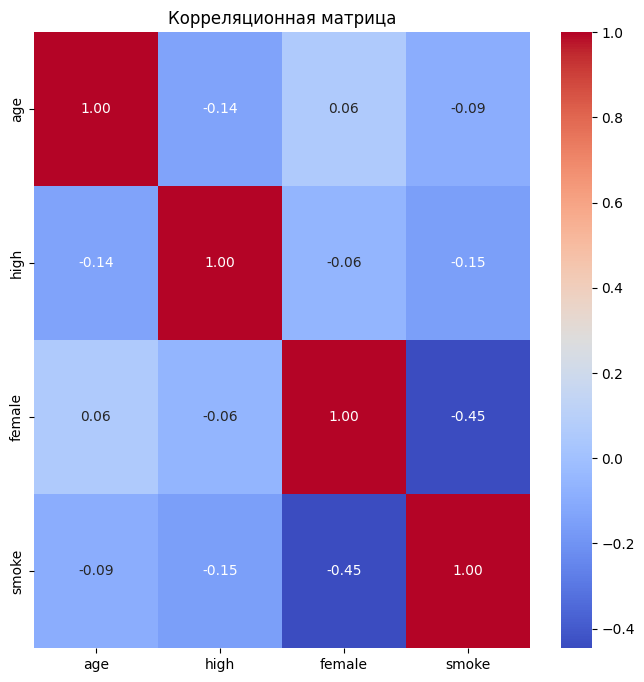

In [ ]:
cor = X.drop('is_children', axis=1).corr() # is_children тут у нас как константа
plt.figure(figsize=(8, 8))
sns.heatmap(
    cor, 
    cmap="coolwarm", 
    fmt=".2f", 
    annot=True,
    xticklabels=cor.columns,
    yticklabels=cor.columns
)
plt.title("Корреляционная матрица")
plt.show()

тут в целом есть высокая корреляция только между курением и женщинами, в целом всё нормально, но давайте лучше проверим $VIF_i$

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_without_const = X.drop('is_children', axis=1)

# Вычисление VIF для каждой переменной
vif_data = pd.DataFrame()
vif_data['Фактор'] = X_without_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_without_const.values, i) for i in range(X_without_const.shape[1])]
print(vif_data)

   Фактор       VIF
0     age  5.609958
1    high  1.697088
2  female  4.350101
3   smoke  1.355180


Как и предполагалось, мультиколлинеарности нет, все VIF меньше 10 

## Задание 8

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
X_noconst = X.drop(['is_children'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_noconst)
pca = PCA()
principal_components = pca.fit_transform(X_scaled)
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, index=['PC1', 'PC2', 'PC3', 'PC4'], columns=['age', 'female', 'smoke', 'high']).T
explained_variance = pca.explained_variance_ratio_
print(f'Доля объясненной дисперсии 1 главная компонента: {explained_variance[0]:.2f}')
print(f'Доля объясненной дисперсии 2 главная компонента: {explained_variance[1]:.2f}')
print(f'Доля объясненной дисперсии 3 главная компонента: {explained_variance[2]:.2f}')
print(f'Доля объясненной дисперсии 4 главная компонента: {explained_variance[3]:.2f}')
loadings_df

Доля объясненной дисперсии 1 главная компонента: 0.37
Доля объясненной дисперсии 2 главная компонента: 0.29
Доля объясненной дисперсии 3 главная компонента: 0.22
Доля объясненной дисперсии 4 главная компонента: 0.12


,PC1,PC2,PC3,PC4
age,-0.195432,-0.625116,0.741961,0.143281
female,-0.085755,0.760086,0.554500,0.327787
smoke,-0.676971,-0.080433,-0.368168,0.632213
high,0.704388,-0.158205,-0.080474,0.687265


## Задание 9

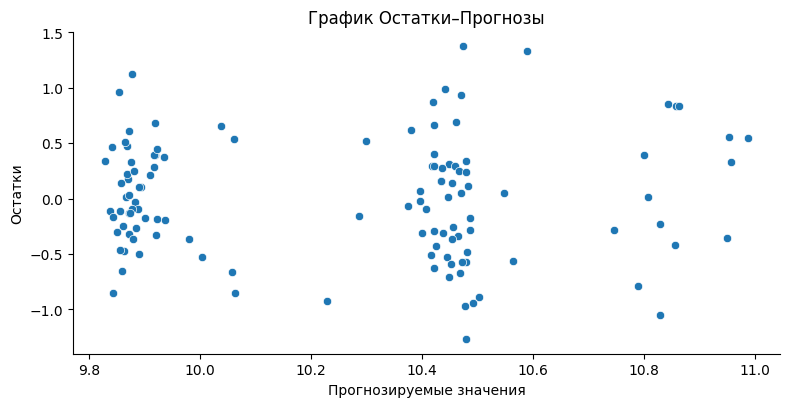

In [57]:
X = df[['age', 'high', 'female', 'is_children', 'smoke']]
X = sm.add_constant(X)
y = np.log(df['wage'])

model_2 = sm.OLS(y, X).fit()

residuals = model_2.resid  # Остатки модели
predictions = model_2.predict()  # Прогнозируемые значения

sns.relplot(
    y=residuals,
    x=predictions,
    kind='scatter',
    height=4,
    aspect=2
).set(xlabel="Прогнозируемые значения", ylabel="Остатки", title='График Остатки–Прогнозы')

Text(0.5, 1.0, 'Распределение остатоков')

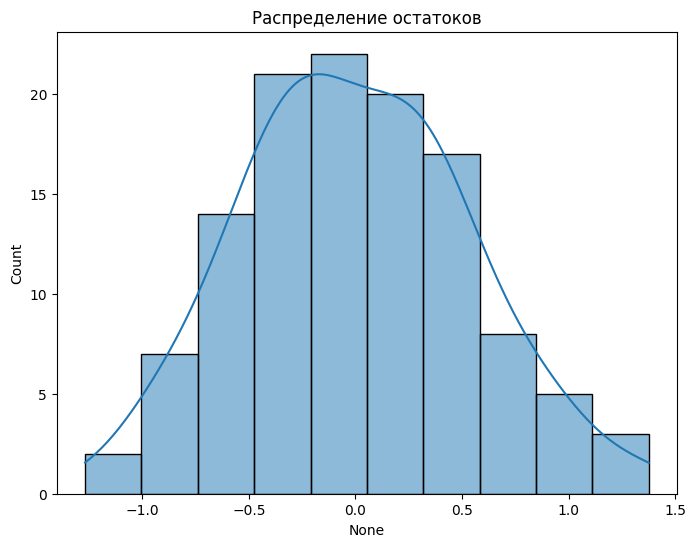

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    x=residuals,
    kde=True,
    ax=ax
).set_title('Распределение остатоков')

## Задание 10

### Тест Уайта

In [83]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(residuals, X)
hi2 = white_test[0]
p_val = white_test[1]
print(hi2)
print(p_val)

27.011086913012925
0.004577543961819622


По тесту Уайта мы отвергаем гипотизу $H_0$, поскольку p-value маленький, значит гетероскедастичность присутсвует

### Тест Бройша-Пагана

In [84]:
from statsmodels.stats.diagnostic import het_breuschpagan
breuschpagan_test = het_breuschpagan(residuals, X)
hi2 = breuschpagan_test[0]
p_val = breuschpagan_test[1]
print(hi2)
print(p_val)

10.296191239845779
0.03572326072825726


Данный тест даёт нам шанс на то что всё ок, но нет веть на нормальном уровне значимости (например 0.05) p-value всё равно маленький, значит точно $H_0$ снова отвергаем, получается гетероскедастичность присутсвует

### Исправление гетероскедастичности с помощью взвешенного метода МНК с оценками дисперсий из теста Глейзера

In [89]:
residuals_squared = residuals ** 2

# Добавляем константу для модели дисперсии
X_var = sm.add_constant(X)

# Модель для логарифма квадратов остатков
model_var = sm.OLS(np.log(residuals_squared), X_var).fit()
print(model_var.summary())

# Предсказание логарифма дисперсии
log_var_pred = model_var.predict(X_var)

# Оценка дисперсии
var_pred = np.exp(log_var_pred)

# Веса для WLS
weights = 1 / var_pred


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.924
Date:                Sun, 15 Dec 2024   Prob (F-statistic):              0.111
Time:                        23:49:41   Log-Likelihood:                -242.60
No. Observations:                 119   AIC:                             495.2
Df Residuals:                     114   BIC:                             509.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age            -0.0254      0.015     -1.730      

In [90]:
model_wls = sm.WLS(y, X, weights=weights).fit()
print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.310
Model:                            WLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     12.83
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           1.17e-08
Time:                        23:49:44   Log-Likelihood:                -89.906
No. Observations:                 119   AIC:                             189.8
Df Residuals:                     114   BIC:                             203.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age            -0.0055      0.004     -1.442      

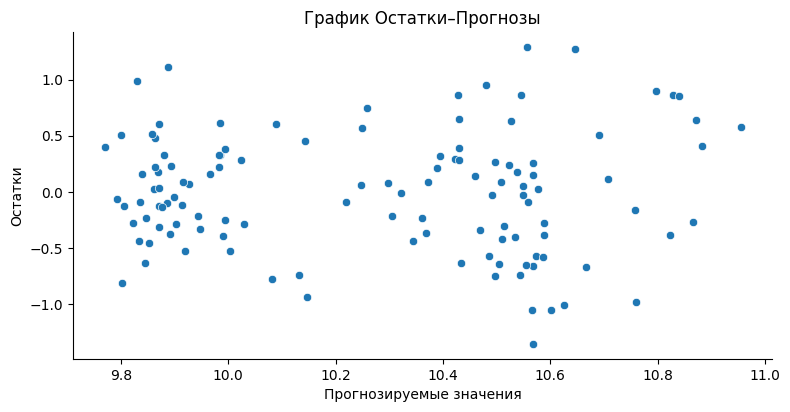

In [91]:
residuals_wls = model_wls.resid  # Остатки модели
predictions_wls = model_wls.fittedvalues  # Прогнозируемые значения

sns.relplot(
    y=residuals_wls,
    x=predictions_wls,
    kind='scatter',
    height=4,
    aspect=2
).set(xlabel="Прогнозируемые значения", ylabel="Остатки", title='График Остатки–Прогнозы')

In [92]:
white_test_wls = het_white(residuals_wls, X)
white_p_val_wls = white_test_wls[1]
print(f"White test p-value after WLS: {white_p_val_wls}")

# Тест Бройша-Пагана
bp_test_wls = het_breuschpagan(residuals_wls, X)
bp_p_val_wls = bp_test_wls[1]
print(f"Breusch-Pagan test p-value after WLS: {bp_p_val_wls}")


White test p-value after WLS: 0.0018663756952347014
Breusch-Pagan test p-value after WLS: 0.008653105417447847


круто, мне это не помогло, поэтому будем пользоваться другим методом


### Робастеные стандартные ошибки в форме Уайта

In [73]:
X = df[['age', 'high', 'female', 'is_children', 'smoke']]
X = sm.add_constant(X)
y = np.log(df['wage'])

model = sm.OLS(y, X).fit(cov_type='HC3')  # или 'HC0', 'HC1', 'HC2'
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     11.77
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           4.90e-08
Time:                        23:25:43   Log-Likelihood:                -92.906
No. Observations:                 119   AIC:                             195.8
Df Residuals:                     114   BIC:                             209.7
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age            -0.0023      0.004     -0.551      

In [74]:
residuals_correct = model.resid
white_test_correct = het_white(residuals_correct, X)
hi2 = white_test_correct[0]
p_val = white_test_correct[1]
print(p_val)

0.004577543961819622


ну, особо ничего не помогло, но в первом случае хотя бы облако ошибок стало лучше

## Задание 11

In [93]:

from statsmodels.stats.diagnostic import linear_reset
reset = linear_reset(res=model, power=2, test_type="fitted", use_f=True)
p_value = reset.pvalue
f = reset.fvalue
print(f'p-value({p_value:.3f})')
print(f'f-value({f:.3f})')
print(reset)

p-value(0.134)
f-value(2.277)
<F test: F=2.2771888215996143, p=0.13408068423377537, df_denom=113, df_num=1>
